<center><font size="3"><b>Digital Signal Processing Lab </b></font></center>
<br />
<center><font size="6"><b><u>Filter banks</u></b></font></center>
<br />
<br />

# Imports

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.io.wavfile import read, write
import IPython.display as ipd

# Introduction

Filter bank is a set of band-pass filters that separate the input signal into multiple components, each one carrying a single frequency sub-band of the original signal. Filter banks have found many different applications, including compression and spectrum analysis.<br>
<br>
The process of decomposition of the input signal performed by a filter bank is called <b>analysis</b> (meaning analysis of the signal in terms of its components in each sub-band), whereas the reconstruction process is called <b>synthesis</b> (meaning reconstitution of a complete signal resulting from the filtering process). The general framework for dividing a signal into sub-bands is presented in the diagram below, where $x$ is the input signal, $H_k(z)$ is the transmitation of the $k$-th analysis filter, $y_k$ is the $k$-th sub-band component, $G_k(z)$ is the transmitation of the $k$-th synthesis filter, $y$ is the synthesized signal and $k=0,1,2...M-1$, where $M$ denotes the number of sub-bands. Since we limit the bandwith via the band-pass filter, we can decimate the signal to reduce the number of samples. We do that to lower the ammount of the memory needed for storage and to speed up the computations. In the process of reconstruction the sub-band signals are expanded and filtered with the synthesis filters. Finally, the resulting signals are summed up.

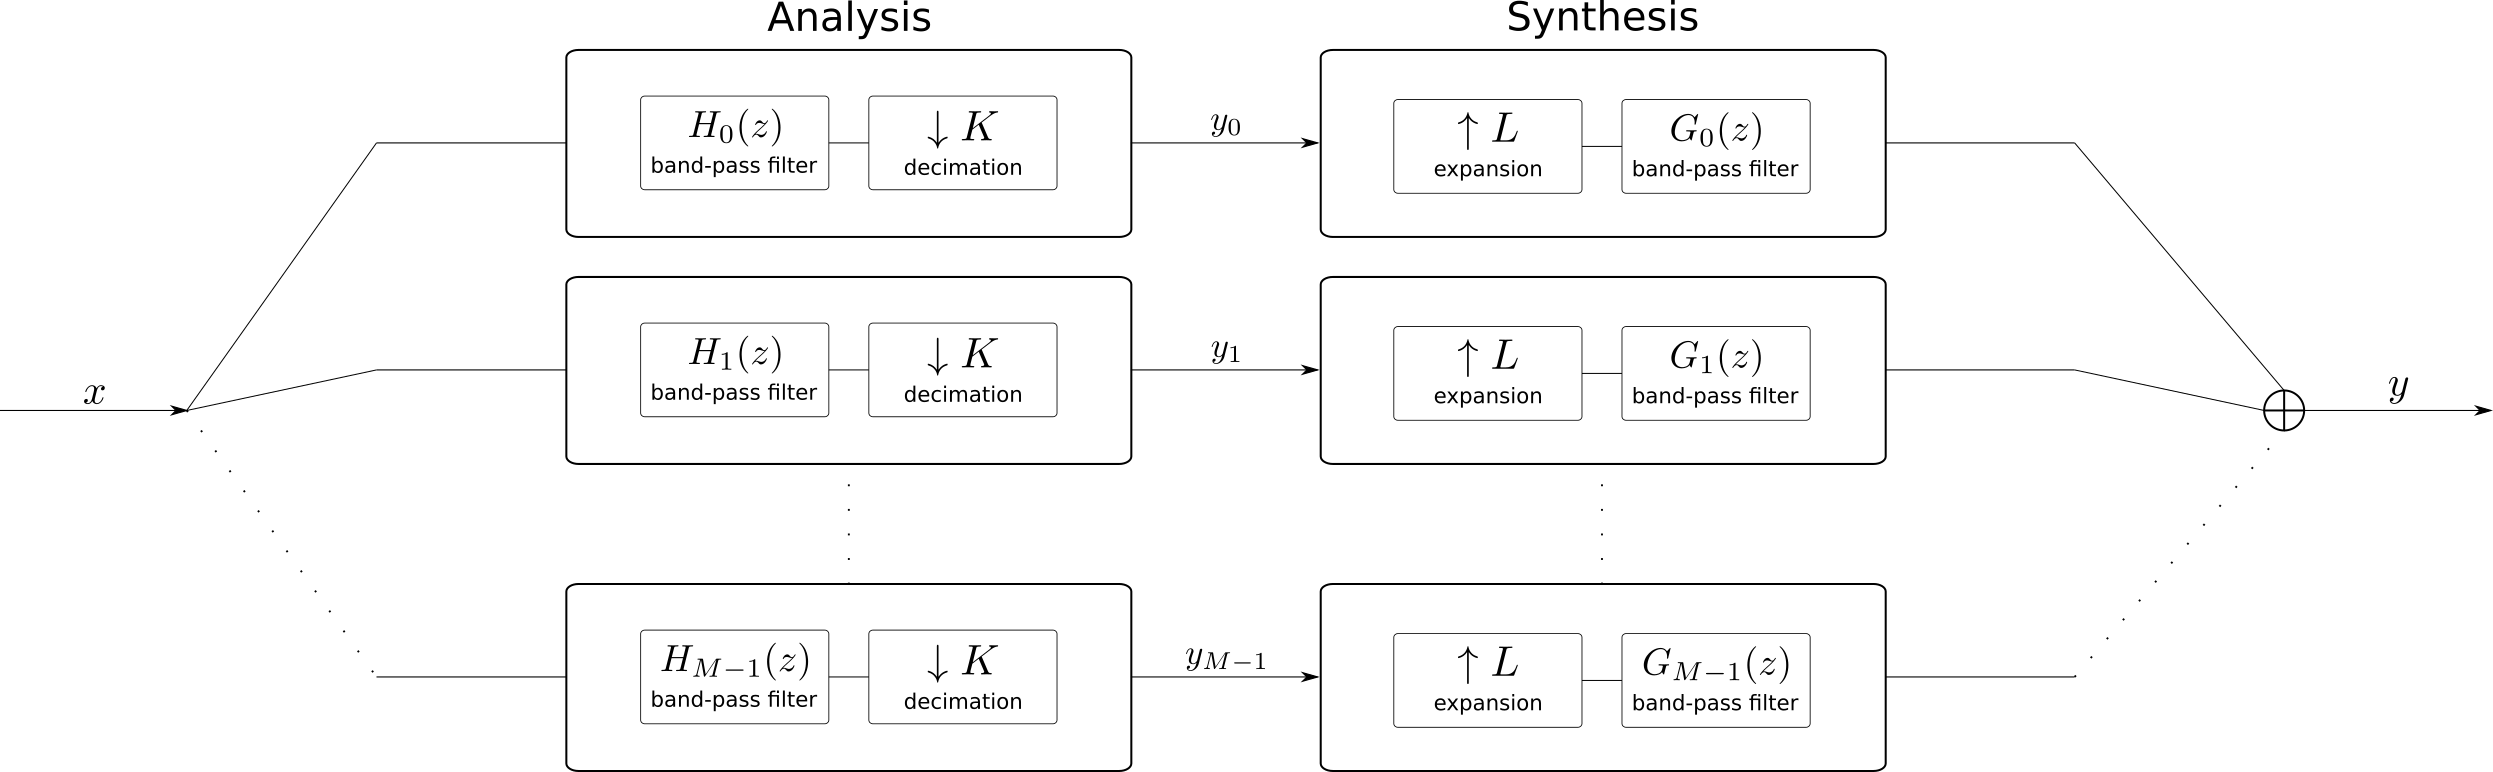

For the rest of this notebook we are going to consider the simplest setting when $M=K=L$, which is called the critical sampling.

# Cosine-modulated filterbank

The filters can be obtained through the cosine modulation of a prototype low-pass filter. We are going to focus on orthogonal systems, in which the prototype filter is the same for the analysis and synthesis sections. In this case the analysis filters are determined according to the formula:
$$\large
    h_k(n)
    =
    2p(n)cos
    \left(
        \frac{\Pi}{M}
        \left(
            k + 0,5
        \right)
        \left(
            n - \frac{N_p-1}{2} + \left(-1 \right)^k \frac{\Pi}{4}
        \right)
    \right)
,$$

where $h_k(n)$ is the impulse response of the k-th analysis filter, $p(n)$ denotes the the impulse response of the low-pass prototype filter and $N_p$ is the length of the prototype filter.
<br>
<br>
The synthesis filters are then given by:
$$\large
    g_k(n)
    =
    2p(n)cos
    \left(
        \frac{\Pi}{M}
        \left(
            k + 0,5
        \right)
        \left(
            n - \frac{N_p-1}{2} - \left(-1 \right)^k \frac{\Pi}{4}
        \right)
    \right)
,$$
where $g_k(n)$ is the impulse response of the k-th synthesis filter.
<br>
<br>
The prototype filter cutoff frequency should be equal to $\large \frac{f_s}{2}\frac{1}{2M}$.
If the impulse response of the prototype filter $p(n)$ is symmetric, then the impulse responses of the synthesis filters $g_k$ are simply time-reversed impulse responses of the analysis filters $h_k$.

##  Task

Design a proper prototype filter in the cell below. Try different values of $M$ and checkout it's response shown two cells below. The variable holding the impulse response should be named `p`.

In [93]:
"Your code goes below here."

M= 6
N_p= 30 

p= scipy.signal.firwin(N_p, 1/(2*M),window='hamming', pass_zero= 'lowpass')



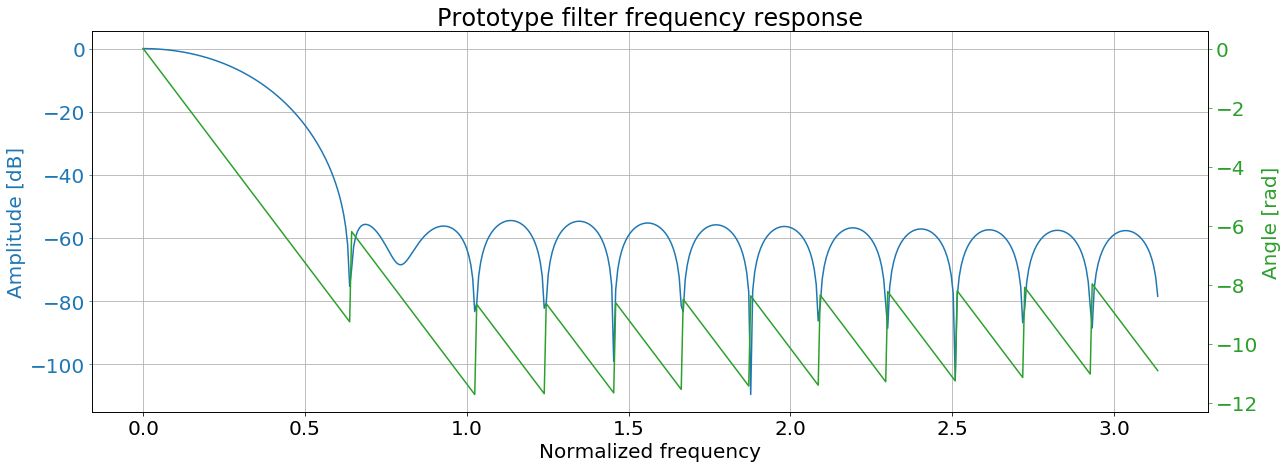

In [94]:
w, P = scipy.signal.freqz(p)
angles = np.unwrap(np.angle(P))


plt.rc('font', size=20)
fig, ax = plt.subplots(figsize=(20, 7))

ax.plot(w, 20*np.log10(abs(P)), '#1f77b4')
ax.grid()
ax.set_title('Prototype filter frequency response')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude [dB]', color='#1f77b4')
ax.tick_params(axis='y', colors='#1f77b4')

ax2 = ax.twinx()
ax2.plot(w, angles, '#2ca02c')
ax2.set_ylabel('Angle [rad]', color='#2ca02c')
ax2.tick_params(axis='y', colors='#2ca02c')

fig.show()

## Task

Given the formulas for the analysis and synthesis filters complete the two functions below, then run the next two cells and checkout the resulting filterbank magnitude response. Try designing the filterbank with different values of $M$ by changing the prototype filter from the previous task.

In [139]:
def analysis_filters(p, M):
    """
    This function returns the filter bank analysis filters.
    The filters are obtained through the cosine modulation of a prototype low-pass filter.
    
    Parameters:
        p - Impulse response of a prototype low-pass filter.
        M - Number of sub-bands.
   
    Returns:
        h - Set of analysis filters.
    """
    
    "Your code goes below here."

    h= np.zeros((M, len(p)))
    N_p= len(p)
    
    for k in range (M):
        for n in range (N_p):
            h[k,n]= 2*p[n]*np.cos((np.pi/4)*(k+0.5)*(n-(len(p)-1)/2+((-1)**k)*np.pi/4))
    
    
    return h

def synthesis_filters(p, M):
    """
    This function returns the filter bank synthesis filters.
    The filters are obtained through the cosine modulation of a prototype low-pass filter.
    
    Parameters:
        p - Impulse response of a prototype low-pass filter.
        M - Number of sub-bands.
   
    Returns:
        g - Set of synthesis filters.
    """
    
    "Your code goes below here."

    g= np.zeros((M, len(p)))
    N_p= len(p)
    
    for k in range (M):
        for n in range (N_p):
            g[k,n]= 2*p[n]*np.cos((np.pi/4)*(k+0.5)*(n-(len(p)-1)/2-((-1)**k)*np.pi/4))
            
    return g   

In [140]:
h = analysis_filters(p, M)
g = synthesis_filters(p, M)

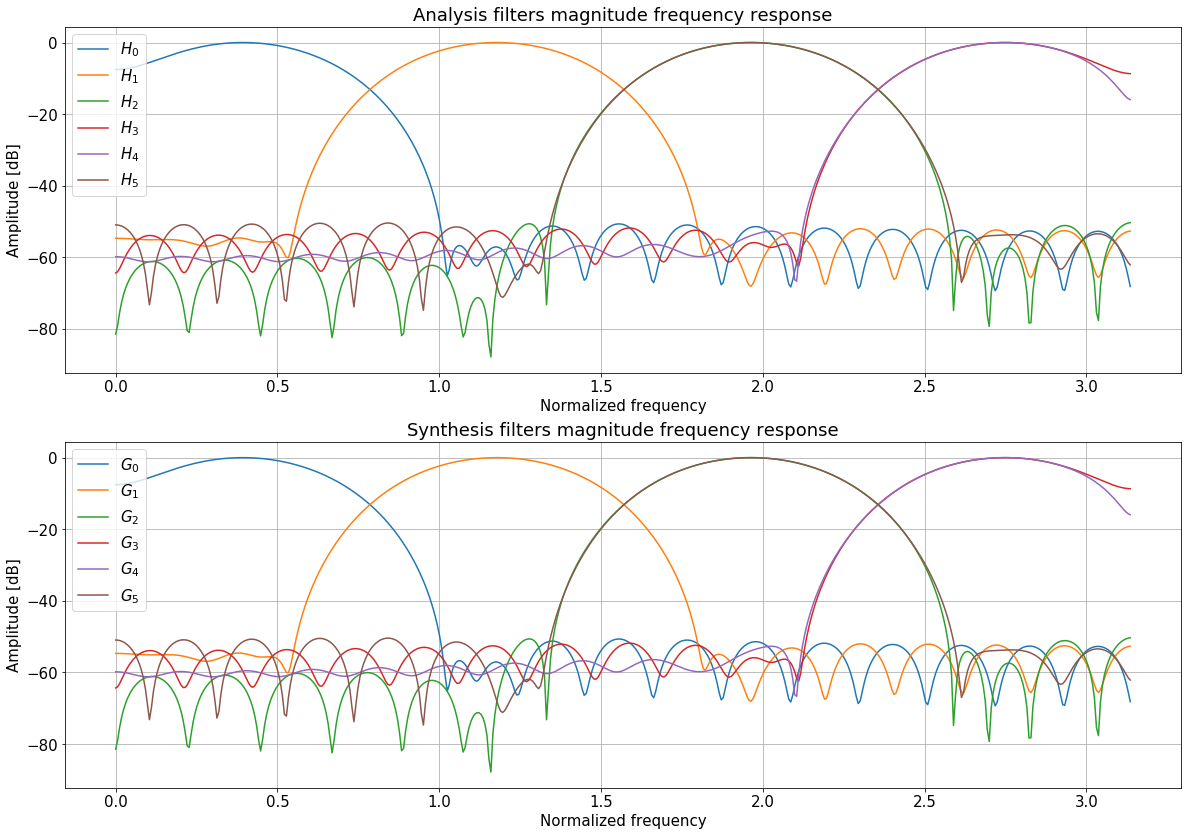

In [141]:
plt.rc('font', size=15)

fig, ax = plt.subplots(2, 1, figsize=(20, 14))

for k in range(M):
    w, H = scipy.signal.freqz(h[k])
    ax[0].plot(w, 20*np.log10(abs(H+1e-6)), label='$H_{}$'.format(k))
ax[0].grid()
ax[0].set_title('Analysis filters magnitude frequency response')
ax[0].set_xlabel('Normalized frequency')
ax[0].set_ylabel('Amplitude [dB]')
ax[0].legend()

for k in range(M):
    w, G = scipy.signal.freqz(g[k])
    ax[1].plot(w, 20*np.log10(abs(G)+1e-6), label='$G_{}$'.format(k))
ax[1].grid()
ax[1].set_title('Synthesis filters magnitude frequency response')
ax[1].set_xlabel('Normalized frequency')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].legend()

plt.show()

Why does the synthesis and analysis filters have the same magnitude frequency response? When would they differ?

# Perfect reconstruction

In many appliations a filter bank should have the <b>perfect reconstruction property</b>, meaning that it can only change the input signal in a specific way, so that:
<center>
    $$\large
    y(n) = c*x(n - \tau),
    $$
</center>
<br>
where $x(n)$ is the input signal, $\tau$ is a time shift, $c$ is a constant and $y(n)$ is the snthesized signal. In other words, the synthesized signal should be a scaled and delayed version of the input signal.

## Task

Copy `decimate` and `expand` functions from the previous notebook and paste them below, then complete the `analysis` and `synthesis` functions. A proper check is at the end of the next task.

In [143]:
"Your code goes below here."

def decimate(x, K, t=None):
    """
    This function decimates a given signal K-times.
    It also returns new timestamps if they were given.
    
    Parameters:
        x - Vector to decimate.
        t - Timestamps.
        K - Decimation factor. It should be an integer.
    
    Returns:
        y_K - Decimated signal.
        t_K - New timestamps.
    """
    
    "Your code goes below here."
    
    
    
    y_K= x[::K]
    
    if t is None:
        return y_K
    
    
    else:
        t_K= t[::K]
    
    return y_K, t_K

def expand(x, L , t=None):
    """
    This function expands a given signal L-times. It also returns new timestamps if they were given.
    
    Parameters:
        x - Vector to expand.
        L - Expansion factor. It should be an integer.
    
    Returns:
        y_L - Expanded signal.
        t_L - New timestamps.
    """
    
    "Your code goes below here."
    
    y_L= np.zeros(L*len(x))
    y_L[::L]= x 
    
    if t is None:
        return y_L
    else:
        t_L= np.linspace(min(t),(t[1]-t[0])/L*(L-1)+ max(t), L*len(t))

    return y_L, t_L


In [147]:
def analysis(x, h):
    """
    This function performs the analysis step of the filter bank.
    
    Parameters:
        x - Vector to analyze.
        h - Set of impulse responses of the analysis filters.
    
    Returns:
        y_k - Set of sub-band signals.
    """
    
    "Your code goes below here."
    
    K_p= np.size(h, 0)
    y_k= np.zeros((K_p, len(decimate(np.convolve(x, h[0,:]),K_p))))
    
    for i in range(M):
        xt= np.convolve(x, h[i,:])
        y_k[i]= decimate(xt,M)

        
    return y_k
    
def synthesis(y_k, g):
    """
    This function performs the synthesis step of the filter bank.
    
    Parameters:
        y_k - Set of sub-band signals.
        g - Set of impulse responses of the synthesis filters.
    
    Returns:
        y - Synthesized signal.
    """
    
    "Your code goes below here."

    L_p= np.size(g,0)
    y= np.zeros((len(expand(y_k[0],M))+ np.size(g,1)-1))
    
    for i in range(L_p):
        yExpanded= expand(y_k[i], M )
        y += np.convolve(yExpanded, g[i,:])
    
    c= M
    y= c*y

        
    return y

## Task

Check if your filterbank has the property of perfect reconstruction by looking at it's impulse repsonse. Generate a proper signal `x`, run it through the filterbank using the `analysis` and `synthesis` functions and place the result in a variable called  `y`. Verify the result by looking at the plot shown below. Try increasing the value of $N_p$ during the design of the prototype filter until it is good enough. Why does increasing the length of the prototype filter results with better reconstruction?

In [148]:
"Your code goes below here."

fs= 50
t= np.arange(0,1,1/fs)

x= scipy.signal.unit_impulse(100)

test= analysis(x,h)

y= synthesis(test,g)

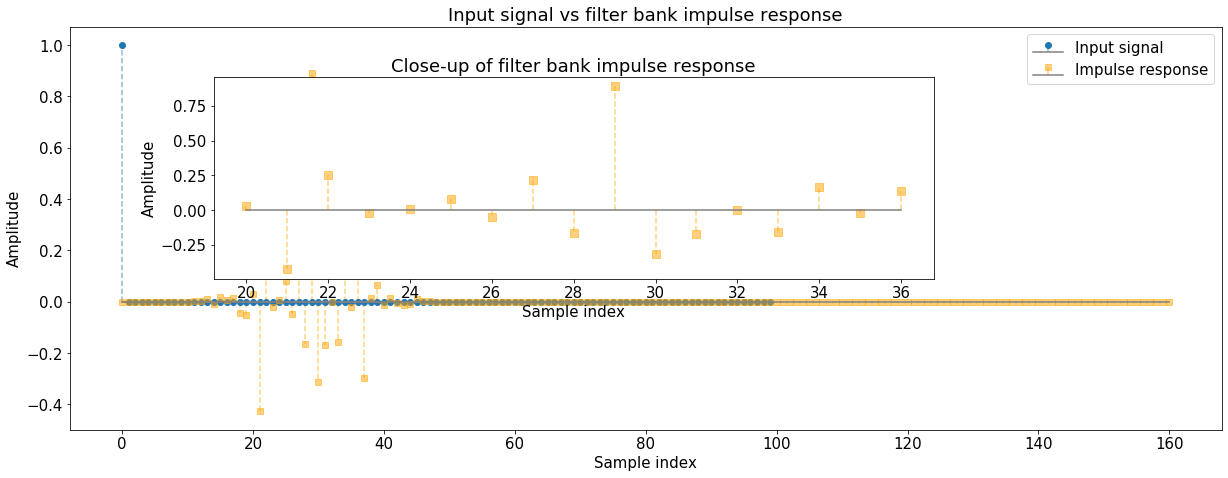

In [149]:
idx = np.argmax(y)
y_closeup = y[int(0.7*idx):int(1.3*idx)]


plt.rc('font', size=15)

fig = plt.figure(figsize=(20, 7))

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])


markers, stemlines, baseline = ax1.stem(x, use_line_collection=True, label='Input signal')
plt.setp(baseline, color="grey")
plt.setp(stemlines, linestyle="--", alpha=0.5)
markers, stemlines, baseline = ax1.stem(y, use_line_collection=True, label='Impulse response')
plt.setp(baseline, color="grey")
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', color="orange", alpha=0.5)
ax1.set_title('Input signal vs filter bank impulse response')
ax1.set_xlabel('Sample index')
ax1.set_ylabel('Amplitude')
ax1.legend()

ax2 = fig.add_axes([0.2, 0.4, 0.5, 0.4])
markers, stemlines, baseline = ax2.stem(np.arange(len(y_closeup))+int(0.7*idx), y_closeup, use_line_collection=True, label='Input signal')
plt.setp(baseline, color="grey")
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax2.set_title('Close-up of filter bank impulse response')
ax2.set_xlabel('Sample index')
ax2.set_ylabel('Amplitude')

fig.show()

# Graphic equalizer

One application of a filter bank is a [graphic equalizer](https://en.wikipedia.org/wiki/Equalization_(audio)#Graphic_equalizer), which can boost or attenuate the components and recombine them into a modified version of the original signal.

In [150]:
fs, x = read('cool_song.wav')  # this is a single-channel version

print('Original audio')
display(ipd.Audio(data=x, rate=fs))

Original audio


## Task

Design a filterbank with 4 filters. Boost sub-bands 0 and 3 by 9[dB](https://en.wikipedia.org/wiki/Decibel) and attenuate sub-bands 1 and 2 by 12dB. Use the above signal `x`, place your output in a variable called `y` and listen to the result. It sounds funny, doesn't it? Like it was sung by a duck :} You can also check how does the value of $N_p$ affect the audio. (There is an audible distortion for low values, for example $N_p=13$ and even worst effect if you increase the number of sub-bands, for example $M=16$.)

In [151]:
"Your code goes below here."

N_p= 13
M= 16

p= scipy.signal.firwin(N_p, 1/(2*M),window='hamming',pass_zero= 'lowpass')

g= synthesis_filters(p, M)
h= analysis_filters(p,M)

audio= analysis(x,h)

audio[0]= audio[0]* 10**(9/20)
audio[1]= audio[1]* 10**(-12/20)
audio[2]= audio[2]* 10**(-12/20)
audio[3]= audio[3]* 10**(9/20)

y= synthesis(audio,g)
y= y[:len(x)]


In [152]:
print('Synthesized audio')
y = y / np.linalg.norm(y) * np.linalg.norm(x)  # (if you do something wrong your ears won't explode)
display(ipd.Audio(data=y, rate=fs))

Synthesized audio


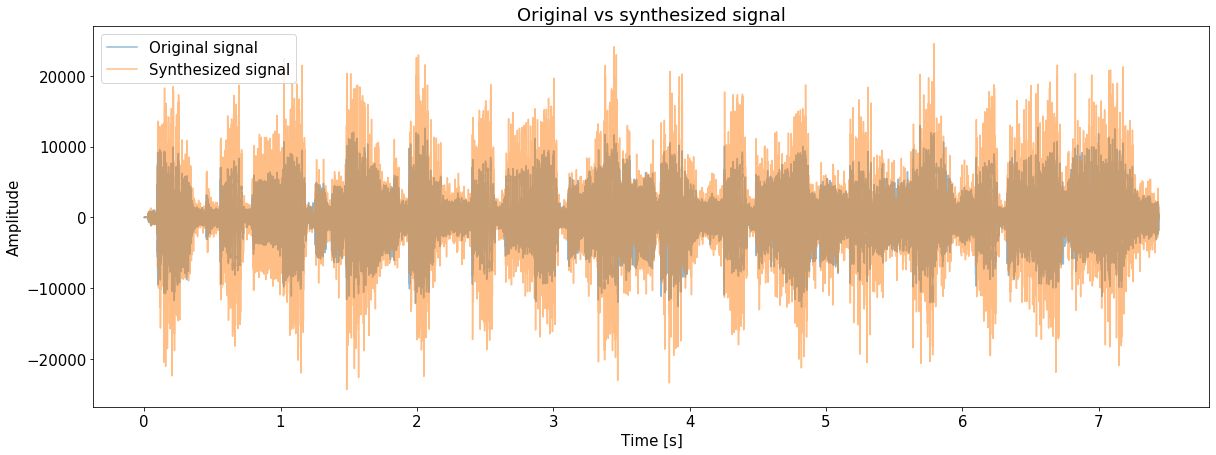

In [153]:
t = np.arange(0, len(x))/fs

plt.rc('font', size=15)

plt.figure(figsize=(20, 7))

plt.plot(t, x, label='Original signal', alpha=0.5)
plt.plot(t, y, label='Synthesized signal', alpha=0.5)
plt.title('Original vs synthesized signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()